In [1]:
from os import path

from matplotlib import pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

DATA_PATH = 'data/'
LABEL_COLS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
CHUNK_SIZE = 1000

In [ ]:
USE_PREPROCESSED = False

In [2]:
def not_toxic(row):
    return 1 if not any(row) else 0

In [3]:
BAD_WORDS = []
with open(DATA_PATH + 'bad_words.txt', 'r') as f:
    BAD_WORDS = f.read().split('\n')

### training_data_path = DATA_PATH
if USE_PREPROCESSED:
    training_data_path + '/preprocessed/'
else:
    training_data_path + '/raw/'
training_data_path += 'train.csv'

In [4]:
df = pd.read_csv(training_data_path)
X = df['comment_text']
# df['not_toxic'] = df[LABEL_COLS].apply(not_toxic, axis=1)
# LABEL_COLS.append('not_toxic')
y = df[LABEL_COLS]

In [5]:
print(f"Number of training rows: {len(df)}")
print(y.sum())

Number of training rows: 159571
toxic            15294.0
severe_toxic      1595.0
obscene           8449.0
threat             478.0
insult            7877.0
identity_hate     1405.0
dtype: float64


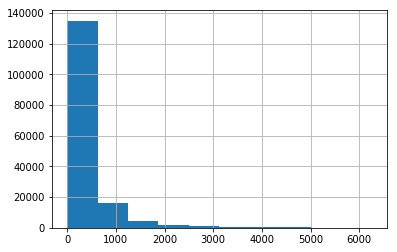

In [6]:
df['char_length'] = df['comment_text'].apply(lambda x: len(str(x)))
df['char_length'].hist()
plt.show()

Most comments fall between 0 and 1000 characters in length. Perhaps characters should be considered as a feature.

In [7]:
df['char_length'].describe()

count    159571.000000
mean        379.955255
std         571.583826
min           1.000000
25%          90.000000
50%         197.000000
75%         421.000000
max        6251.000000
Name: char_length, dtype: float64

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)

In [9]:
clf = OneVsRestClassifier(ComplementNB())

tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
bad_word_counter = CountVectorizer(vocabulary=BAD_WORDS)

union = make_union(tfidf, bad_word_counter)

pipeline = make_pipeline(union, clf)

optimizer = pipeline
parameters = {
    'featureunion__tfidfvectorizer__lowercase': [True, False],
    'onevsrestclassifier__estimator__alpha': [0.001, 0.01, 0.1, 1.0],
    'featureunion__tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'featureunion__tfidfvectorizer__max_features': [1000, 5000, 10000, None]
}

optimizer = GridSearchCV(pipeline, parameters, scoring='f1_weighted', verbose=2)
optimizer.fit(X_train, y_train)
y_predictions = optimizer.predict(X_valid)

best_estimator_ = optimizer.best_estimator_

/home/quontas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001, total=   7.8s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s


[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001, total=   8.0s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001, total=   7.3s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.01 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__esti

[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=1.0, total=  15.8s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=1.0 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=1.0, total=  15.5s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator

[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.1, total=  15.5s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.1 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.1, total=  16.2s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=1.0 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__

[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.01, total=  15.7s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.01 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.01, total=  15.8s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.01 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__es

[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.001, total=  18.9s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.001 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.001, total=  19.1s
[CV] featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.001 
[CV]  featureunion__tfidfvectorizer__lowercase=True, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__est

[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=1.0, total=   8.7s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=1.0 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=1.0, total=   8.5s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=1.0 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=1000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estima

[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.01, total=   9.0s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.1 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.1, total=   9.0s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.1 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=5000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estim

[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001, total=   8.7s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.001, total=   8.6s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassifier__estimator__alpha=0.01 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 1), onevsrestclassi

[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=1.0, total=  15.9s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=1.0 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=1.0, total=  15.4s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=1.0 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=10000, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__e

[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.01, total=  28.3s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.1 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.1, total=  28.3s
[CV] featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estimator__alpha=0.1 
[CV]  featureunion__tfidfvectorizer__lowercase=False, featureunion__tfidfvectorizer__max_features=None, featureunion__tfidfvectorizer__ngram_range=(1, 2), onevsrestclassifier__estim

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed: 64.8min finished


In [10]:
hamming_loss = metrics.hamming_loss(y_valid, y_predictions, labels=LABEL_COLS)
jaccard = metrics.jaccard_similarity_score(y_valid, y_predictions)
print(f'Hamming loss (lower is better): {hamming_loss}')
print(f'Jaccard similarity (higher is better): {jaccard}')
print()
print(metrics.classification_report(y_valid, y_predictions, target_names=LABEL_COLS))

Hamming loss (lower is better): 0.035378567766193816
Jaccard similarity (higher is better): 0.9199823392012761

               precision    recall  f1-score   support

        toxic       0.77      0.70      0.74      5057
 severe_toxic       0.26      0.83      0.40       531
      obscene       0.72      0.84      0.78      2843
       threat       0.05      0.72      0.10       163
       insult       0.60      0.75      0.67      2662
identity_hate       0.16      0.68      0.25       471

    micro avg       0.52      0.75      0.61     11727
    macro avg       0.43      0.76      0.49     11727
 weighted avg       0.67      0.75      0.69     11727
  samples avg       0.05      0.07      0.05     11727



/home/quontas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/quontas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
